## R과 Tableau를 활용한
# 공공자전거 이용데이터 분석 및 시각화
* 충북대학교 빅데이터센터
* 작성자 : 이경희
* 작성일자 : '17.06.01


R 버전 확인하기

In [1]:
version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          5.2                         
year           2018                        
month          12                          
day            20                          
svn rev        75870                       
language       R                           
version.string R version 3.5.2 (2018-12-20)
nickname       Eggshell Igloo              

## 1. 타슈 데이터 입력
* 다운로드 받은 공공자전거 타슈 대여현황 데이터를 분석하기 위하여 데이터를 R로 읽어들이는 과정
* 파일에서 데이터를 읽기위하여 필요한 readxl 라이브러리를 설치되어 있는지 확인한 다음 readxl 라이브러리 임포트

In [2]:
#install.packages("readxl")
library(readxl)

* csv 파일 지정 및 읽기

In [3]:
tashu_2013 <- read_excel("./data/Tashu_data/tashu_rental info_2013_01.xlsx")

## 2. 데이터에 포함된 결측치 확인 및 제거
* 각 컬럼의 데이터 타입이 잘 지정되었는지 확인함
* 또한 summary()함수를 통해 데이터 값의 분포 등도 확인함
* 전체 레코드 개수, 최솟값, 최댓값, 중앙값, 사분위값 및 결측치가 각 컬럼에 몇건정도 포함되어 있는지 확인함

In [4]:
summary(tashu_2013)

  IS_MEMBER          RENT_STATION    RENT_DATE         RETURN_STATION  
 Length:414639      Min.   :  1.0   Length:414639      Min.   :  1.00  
 Class :character   1st Qu.: 16.0   Class :character   1st Qu.: 16.00  
 Mode  :character   Median : 34.0   Mode  :character   Median : 34.00  
                    Mean   : 42.2                      Mean   : 42.24  
                    3rd Qu.: 60.0                      3rd Qu.: 60.00  
                    Max.   :114.0                      Max.   :135.00  
                    NA's   :322                        NA's   :1414    
 RETURN_DATE       
 Length:414639     
 Class :character  
 Mode  :character  
                   
                   
                   
                   

* 전체 레코드 414639건 중에서 대여 스테이션(rent_station)에 결측값 322개, <br/>반납 스테이션(return_station)에 1414건이 포함되어 있는 것을 확인할 수 있음

## 3. 컬럼의 데이터 타입 변환
* str()함수를 통해 tashu_2013의 각 컬럼별 데이터 타입과 데이터 일부 미리보기를 할 수 있음

In [5]:
str(tashu_2013)

Classes 'tbl_df', 'tbl' and 'data.frame':	414639 obs. of  5 variables:
 $ IS_MEMBER     : chr  "No" "No" "No" "No" ...
 $ RENT_STATION  : num  43 97 2 106 4 21 90 13 1 1 ...
 $ RENT_DATE     : chr  "20130101055603" "20130101060400" "20130101060406" "20130101105305" ...
 $ RETURN_STATION: num  34 NA 10 105 4 105 91 30 1 2 ...
 $ RETURN_DATE   : chr  "20130101060217" "20130101102037" "20130101061859" "20130101105743" ...


* 대여 스테이션(rent_station)과 반환 스테이션(return_station) 컬럼은 문자열로 변환

In [6]:
tashu_2013$RENT_STATION <-as.character(tashu_2013$RENT_STATION)
tashu_2013$RETURN_STATION <-as.character(tashu_2013$RETURN_STATION)

* 타입 변환 결과 확인

In [7]:
str(tashu_2013)

Classes 'tbl_df', 'tbl' and 'data.frame':	414639 obs. of  5 variables:
 $ IS_MEMBER     : chr  "No" "No" "No" "No" ...
 $ RENT_STATION  : chr  "43" "97" "2" "106" ...
 $ RENT_DATE     : chr  "20130101055603" "20130101060400" "20130101060406" "20130101105305" ...
 $ RETURN_STATION: chr  "34" NA "10" "105" ...
 $ RETURN_DATE   : chr  "20130101060217" "20130101102037" "20130101061859" "20130101105743" ...


## 4. 결측치 확인
* is.na()함수를 통해 tashu_2013 변수 중 결측치를 확인할 수 있음

In [8]:
sum(is.na(tashu_2013))
apply(tashu_2013, 2, function(x){sum(is.na(x))})

[1] 1740

IS_MEMBER   RENT_STATION      RENT_DATE RETURN_STATION    RETURN_DATE 
             0            322              0           1414              4

* mice 패키지는 결측치의 패턴을 이해하는 더 좋은 방법을 제안하기 위한 함수를 제공하는 패키지
* md.pattern() 함수를 이용하면 결측치의 패턴을 이해하는데 용이함

In [9]:
# install.packages("mice")
library(mice)

Loading required package: lattice

Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind



In [10]:
show_pattern <- function(x) {
    md.pattern(x)
}

,IS_MEMBER,RENT_DATE,RETURN_DATE,RENT_STATION,RETURN_STATION,
413066,1,1,1,1,1,0
1247,1,1,1,1,0,1
159,1,1,1,0,1,1
163,1,1,1,0,0,2
4,1,1,0,1,0,2
,0,0,4,322,1414,1740


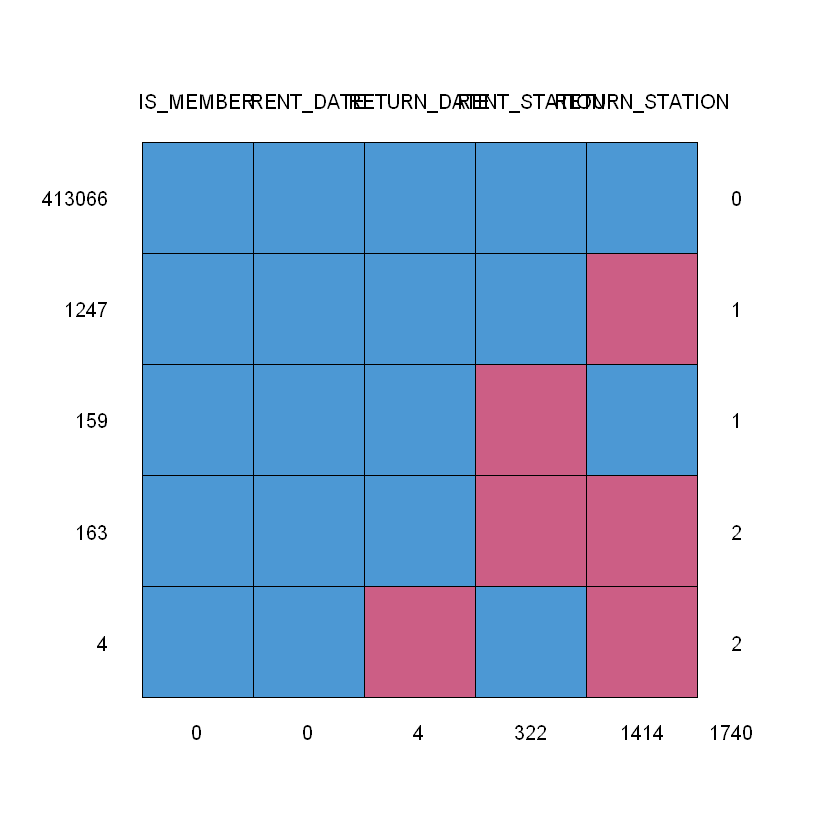

In [11]:
show_pattern(tashu_2013)
# md.pattern(tashu_2013)

# 표 결과 해석
  ## 표의 첫 줄의 각 변수의 이름을 나타냄
    * 표 안의 내용에서 1인 경우 결측치가 없음, 0인 경우 결측치가 있음을 나타냄
* 413066개의 레코드는 결측치가 없음
* Row별 해석
* 1247개의 레코드는 RETURN_STATION 컬럼의 값에 결측치가 있음 => 결측치가 있는 변수 0개
* 159개의 레코드는 RENT_STATION 컬럼의 값에 결측치가 있음 => 결측치가 있는 변수 1개
* 163개의 레코드는 RENT_STATION과 RETURN_STATION 컬럼의 값 모두 결측치가 있음 => 결측치가 있는 변수 2개
* 4개의 레코드는 RETURN_DATE와 RETURN_STATION 컬럼의 값 모두 결측치가 있음 => 결측치가 있는 변수 2개
* Column별 해석
* IS_MEMBER 컬럼은 결측치가 없음
* RENT_DATE 컬럼은 결측치가 없음
* RETURN_DATE 컬럼은 4개의 레코드가 결측치가 있음
* RENT_STATION 컬럼은 322개의 레코드가 결측치가 있음
* RETURN_STATION 컬럼은 1414개의 레코드가 결측치가 있음
* 총 1740개의 레코드가 결측치가 있으며, 413066개의 레코드는 결측치가 없다.

* 결측치 시각화

In [12]:
#install.packages("VIM")
library(VIM)

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



In [13]:
xlabels = c("IS_MEMBER", "RENT_DATE", "RENT_STATION", "RETURN_DATE",  "RETURN_STATION")

Warning message in plot.aggr(res, ...):
"not enough horizontal space to display frequencies"


 Variables sorted by number of missings: 
       Variable        Count
    RETURN_DATE 3.410195e-03
      RENT_DATE 7.765791e-04
 RETURN_STATION 9.646946e-06
      IS_MEMBER 0.000000e+00
   RENT_STATION 0.000000e+00


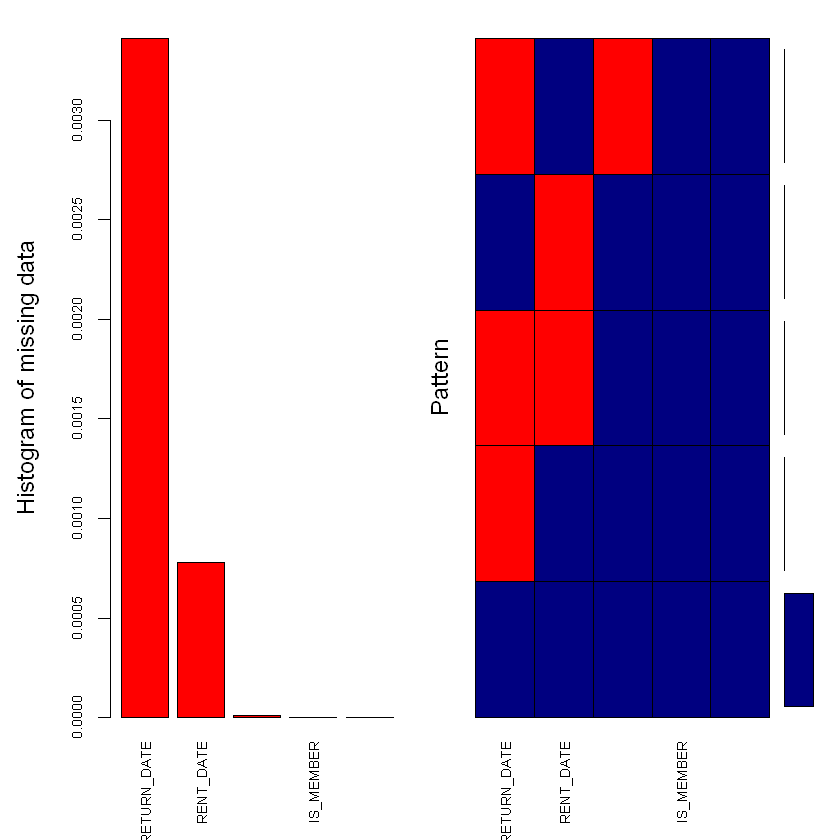

In [14]:
aggr_plot <- aggr(tashu_2013, col=c('navyblue', 'red'), numbers=TRUE, sortVars=TRUE, labels=xlabels, cex.axis =.7, gap=3, ylab=c("Histogram of missing data", "Pattern"))

## 5. 결측치 제거
* 결측치 제거 함수 na.omit()을 사용

In [15]:
newTashu2013 <- na.omit(tashu_2013)
summary(newTashu2013)
str(newTashu2013)

  IS_MEMBER         RENT_STATION        RENT_DATE         RETURN_STATION    
 Length:413066      Length:413066      Length:413066      Length:413066     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 RETURN_DATE       
 Length:413066     
 Class :character  
 Mode  :character  

Classes 'tbl_df', 'tbl' and 'data.frame':	413066 obs. of  5 variables:
 $ IS_MEMBER     : chr  "No" "No" "No" "Yes" ...
 $ RENT_STATION  : chr  "43" "2" "106" "4" ...
 $ RENT_DATE     : chr  "20130101055603" "20130101060406" "20130101105305" "20130101112223" ...
 $ RETURN_STATION: chr  "34" "10" "105" "4" ...
 $ RETURN_DATE   : chr  "20130101060217" "20130101061859" "20130101105743" "20130101121753" ...
 - attr(*, "na.action")= 'omit' Named int  2 66 268 308 311 432 550 587 758 779 ...
  ..- attr(*, "names")= chr  "2" "66" "268" "308" ...


In [16]:
names(newTashu2013) <- c("IS_MEMBER", "RENT_STATION", "RENT_DATE_TIME", "RETURN_STATION",  "RETURN_DATE_TIME")

In [17]:
newTashu2013$RENT_DATE <- substr(newTashu2013$RENT_DATE_TIME, 1, 8)

In [18]:
head(newTashu2013)

IS_MEMBER,RENT_STATION,RENT_DATE_TIME,RETURN_STATION,RETURN_DATE_TIME,RENT_DATE
No,43,20130101055603,34,20130101060217,20130101
No,2,20130101060406,10,20130101061859,20130101
No,106,20130101105305,105,20130101105743,20130101
Yes,4,20130101112223,4,20130101121753,20130101
No,21,20130101113953,105,20130101114943,20130101
No,90,20130101120833,91,20130101125136,20130101
